In [14]:
import numpy as np
from scipy.integrate import odeint
#绘图
import matplotlib.pyplot as plt
#在jupyter中设置行内显示
%matplotlib inline

In [2]:
#写出SIR模型的函数
def SIR(y,t,beta,gamma):
    S,I,R = y
    dSdt = -S*(I/(S+I+R))*beta
    dIdt = S*(I/(S+I+R))*beta-gamma*I
    dRdt = gamma*I
    return [dSdt,dIdt,dRdt]

In [6]:
#为SIR模型设置初始值
#设置人群总人数为N
N = 58000000
#设置初始时的感染人数为239
I0 = 239
#设置初始时的恢复人数R0为31（恢复人数指不会再传染给他人，所以这里指恢复和死亡人数的总和）
R0 = 31
#所以初始易感人群总人数 = 总人数 - 初始感染人数 - 初始治愈人数
S0 = N-I0-R0
#设置初始值
y0 = [S0,I0,R0]

In [9]:
#设置疫情的时间跨度为60天
t = np.linspace(1,60,60)

#设置beta的值等于0.125
beta = 0.125

#设置gamma的值等于0.05
gamma = 0.05

In [10]:
#求解
solution = odeint(SIR, y0, t, args=(beta, gamma))

In [11]:
#显示用正常10进制格式
np.set_printoptions(suppress=True)
#显示前4行结果
solution[0:4,0:3]

array([[57999730.        ,      239.        ,       31.        ],
       [57999698.97630735,      257.6141545 ,       43.40953815],
       [57999665.53640247,      277.67802415,       56.78557338],
       [57999629.49210657,      299.30451407,       71.20337936]])

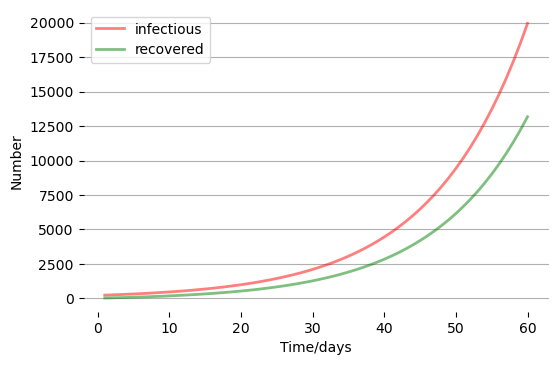

In [15]:
#绘图
fig, ax = plt.subplots(facecolor='w', dpi=100)

for data, color, label_name in zip([solution[:,1], solution[:,2]], ['r', 'g'],['infectious','recovered']):
    ax.plot(t, data, color, alpha = 0.5, lw=2, label=label_name)

ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
ax.legend()
ax.grid(axis='y')
plt.box(False)

In [19]:
#设置疫情的时间跨度为360天
t = np.linspace(1,360,360)

In [21]:
#重新求解
solution = odeint(SIR, y0, t, args=(beta, gamma))

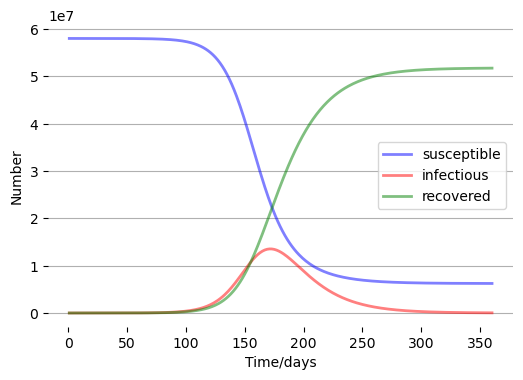

In [22]:
#绘图
fig, ax = plt.subplots(facecolor='w', dpi=100)

for data, color, label_name in zip([solution[:,0] ,solution[:,1], solution[:,2]], ['b','r', 'g'],['susceptible','infectious','recovered']):
    ax.plot(t, data, color, alpha = 0.5, lw=2, label=label_name)

ax.set_xlabel('Time/days')
ax.set_ylabel('Number')
ax.legend()
ax.grid(axis='y')
plt.box(False)